In [27]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# fetch dataset 
tic_tac_toe_endgame = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
X = tic_tac_toe_endgame.data.features 
y = tic_tac_toe_endgame.data.targets 

# Combine features and targets into one DataFrame
df = pd.concat([X, y], axis=1)

# Rename the target column for clarity
df.rename(columns={df.columns[-1]: 'target'}, inplace=True)

# Display the first few rows to ensure merging is correct
df.head()


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,target
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


## EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   top-left-square       958 non-null    object
 1   top-middle-square     958 non-null    object
 2   top-right-square      958 non-null    object
 3   middle-left-square    958 non-null    object
 4   middle-middle-square  958 non-null    object
 5   middle-right-square   958 non-null    object
 6   bottom-left-square    958 non-null    object
 7   bottom-middle-square  958 non-null    object
 8   bottom-right-square   958 non-null    object
dtypes: object(9)
memory usage: 67.5+ KB


In [16]:
df.isna().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
dtype: int64

In [17]:
df = df.dropna()

## VISUALIZATION

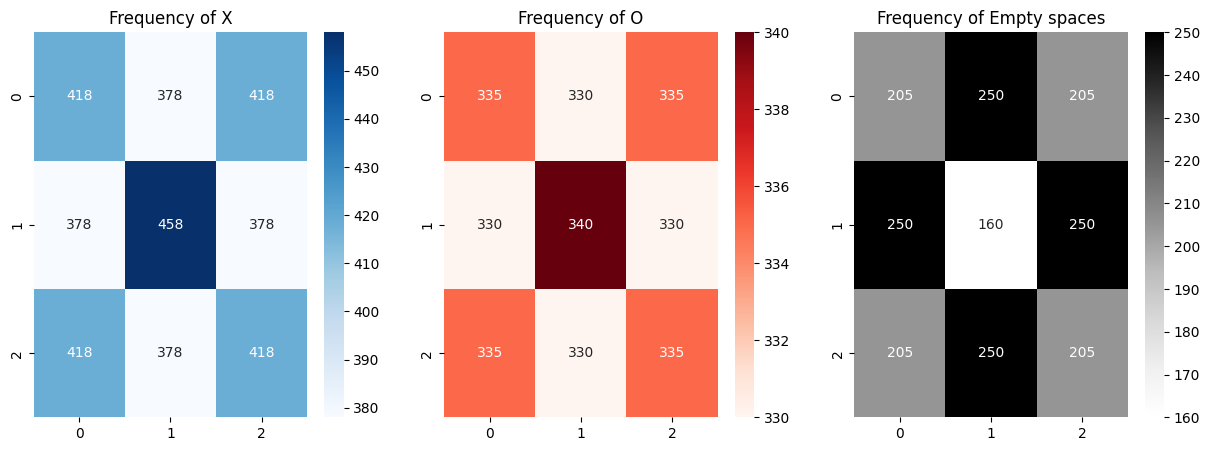

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts = df.apply(pd.Series.value_counts).fillna(0)

# Plot heatmaps for each player's moves
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(counts.loc['x'].values.reshape(3, 3), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Frequency of X')
sns.heatmap(counts.loc['o'].values.reshape(3, 3), annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title('Frequency of O')
sns.heatmap(counts.loc['b'].values.reshape(3, 3), annot=True, fmt="d", cmap="Greys", ax=axes[2])
axes[2].set_title('Frequency of Empty spaces')

plt.show()

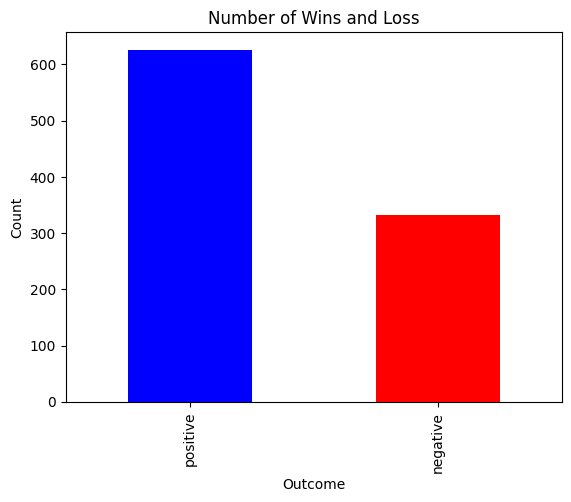

In [29]:
# Count the number of wins for each outcome
winner_counts = df['target'].value_counts()

# Plot the bar chart
winner_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Wins and Loss')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

## TRAIN | TEST SPLIT

In [36]:
from sklearn.model_selection import train_test_split

X.replace({'x': 1, 'o': 2, 'b': 3}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
base_pred = model.predict(X_test)

## EVALUATION

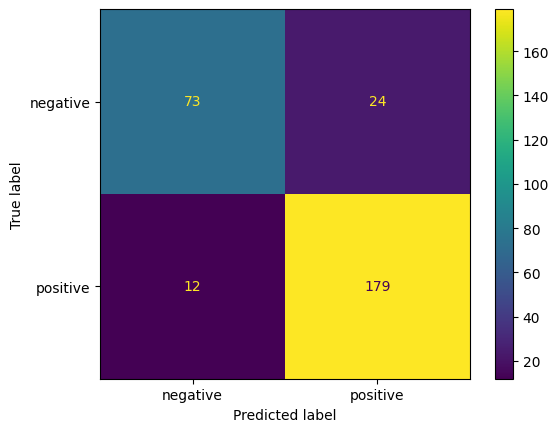

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

cmd.plot()
plt.show()

In [41]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

    negative       0.86      0.75      0.80        97
    positive       0.88      0.94      0.91       191

    accuracy                           0.88       288
   macro avg       0.87      0.84      0.86       288
weighted avg       0.87      0.88      0.87       288



In [42]:
model.feature_importances_

array([0.11131365, 0.11083549, 0.12339617, 0.11891787, 0.10720149,
       0.0913797 , 0.11885114, 0.08608701, 0.13201748])

In [44]:
pd.DataFrame(data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
0,0.111314
1,0.110835
2,0.123396
3,0.118918
4,0.107201
5,0.091380
6,0.118851
7,0.086087
8,0.132017


## Visualize the Tree

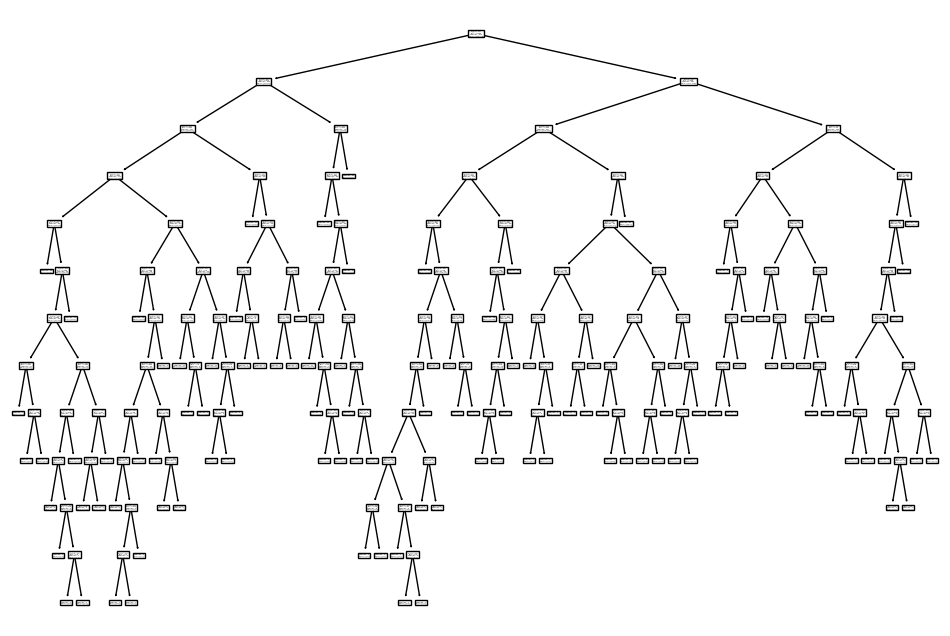

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model);

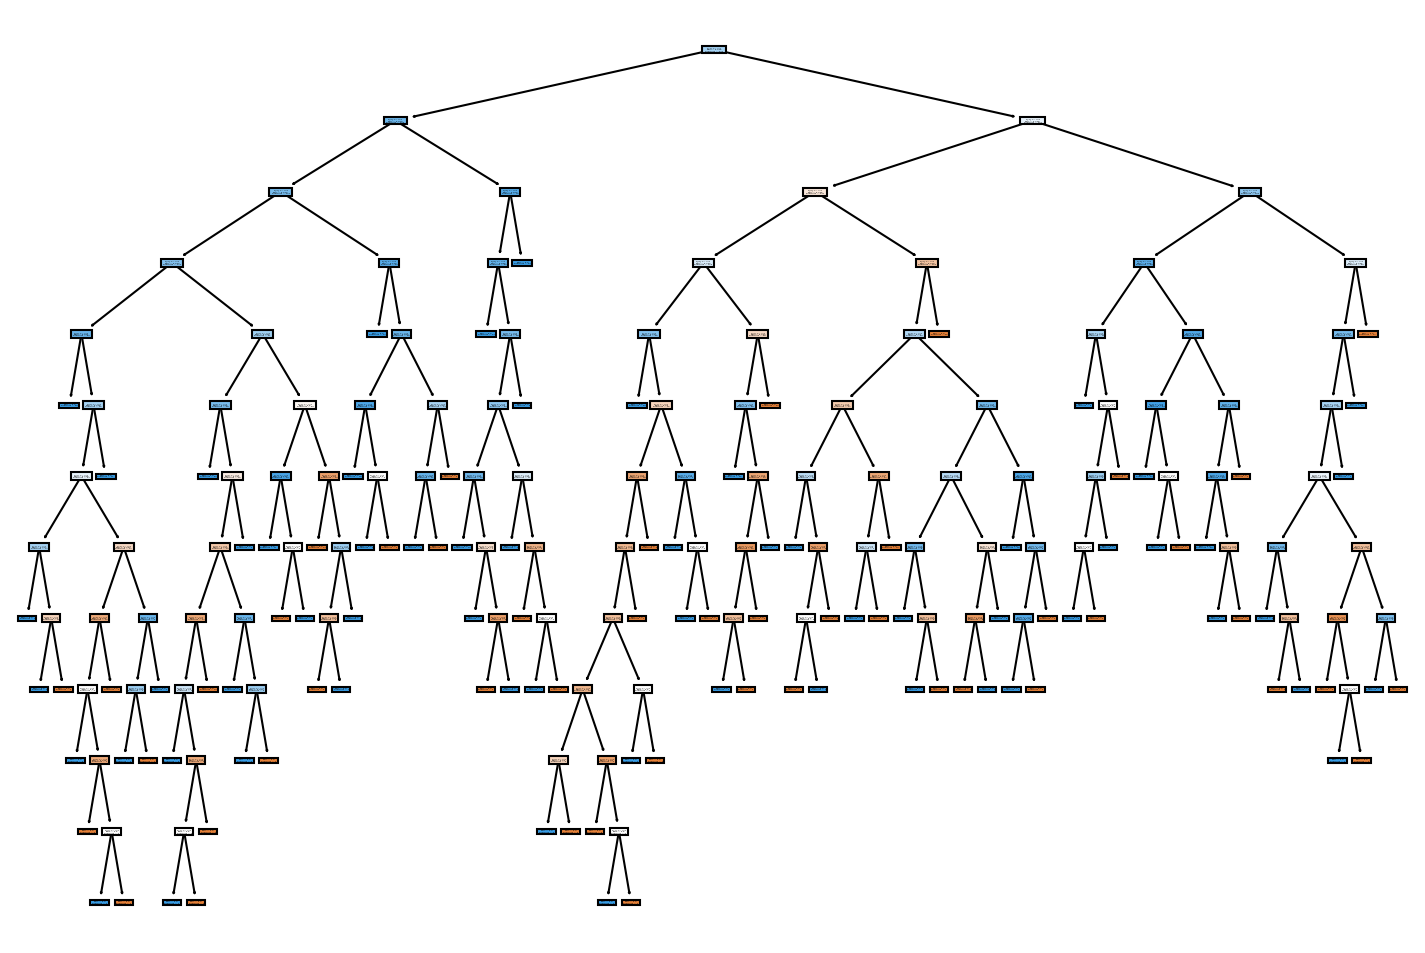

In [50]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True);

## Reporting Model Results

In [54]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True);

In [55]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

    negative       0.60      0.58      0.59        97
    positive       0.79      0.81      0.80       191

    accuracy                           0.73       288
   macro avg       0.70      0.69      0.69       288
weighted avg       0.73      0.73      0.73       288





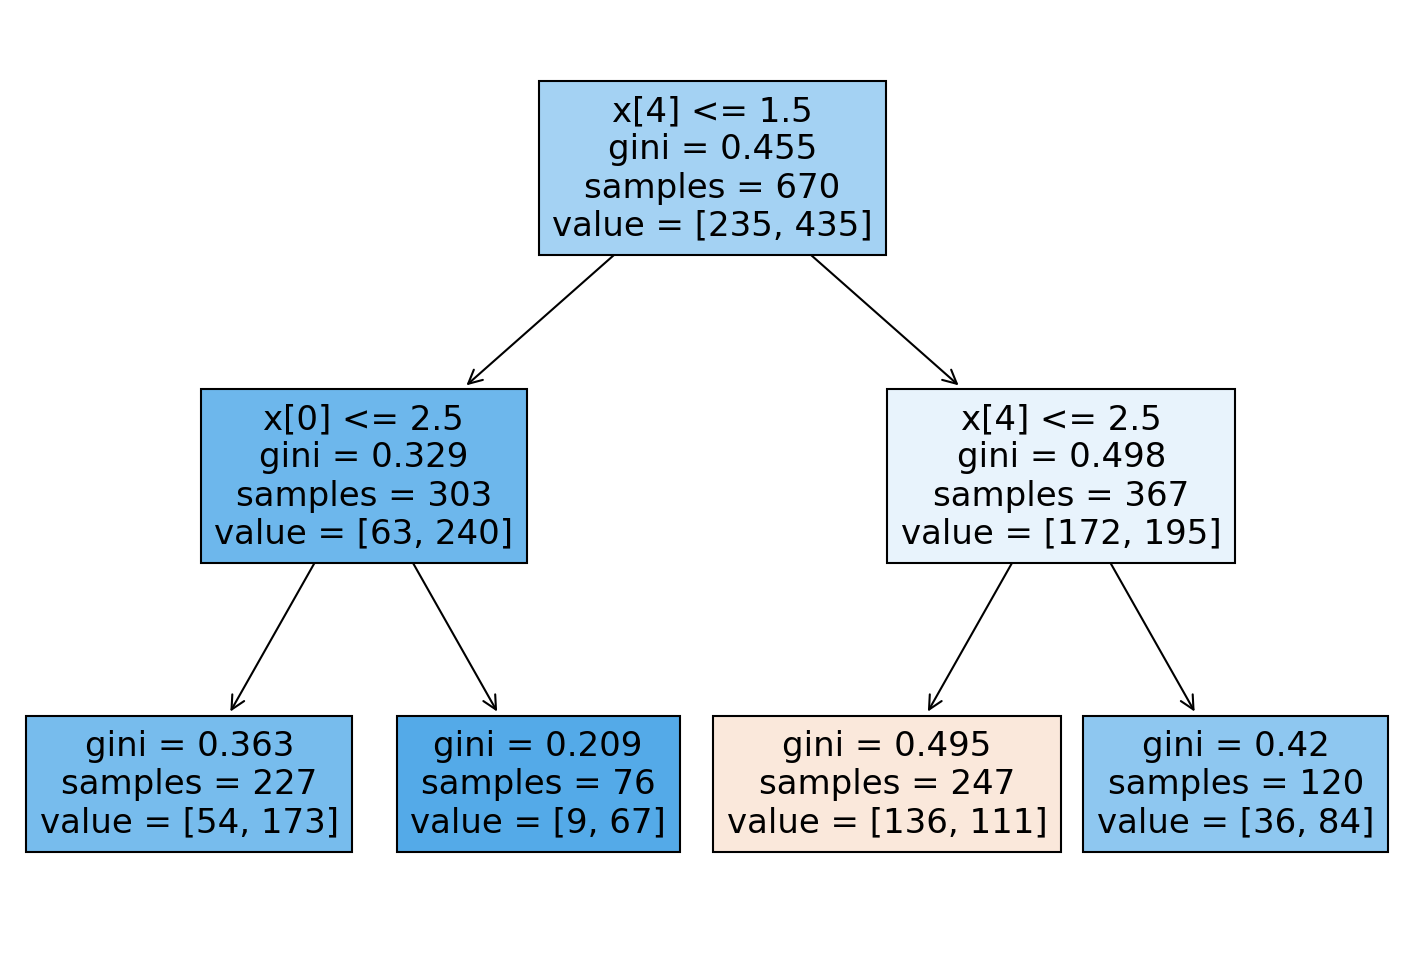

In [56]:
report_model(pruned_tree)

## Max Leaf Nodes

In [57]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

    negative       0.60      0.58      0.59        97
    positive       0.79      0.81      0.80       191

    accuracy                           0.73       288
   macro avg       0.70      0.69      0.69       288
weighted avg       0.73      0.73      0.73       288





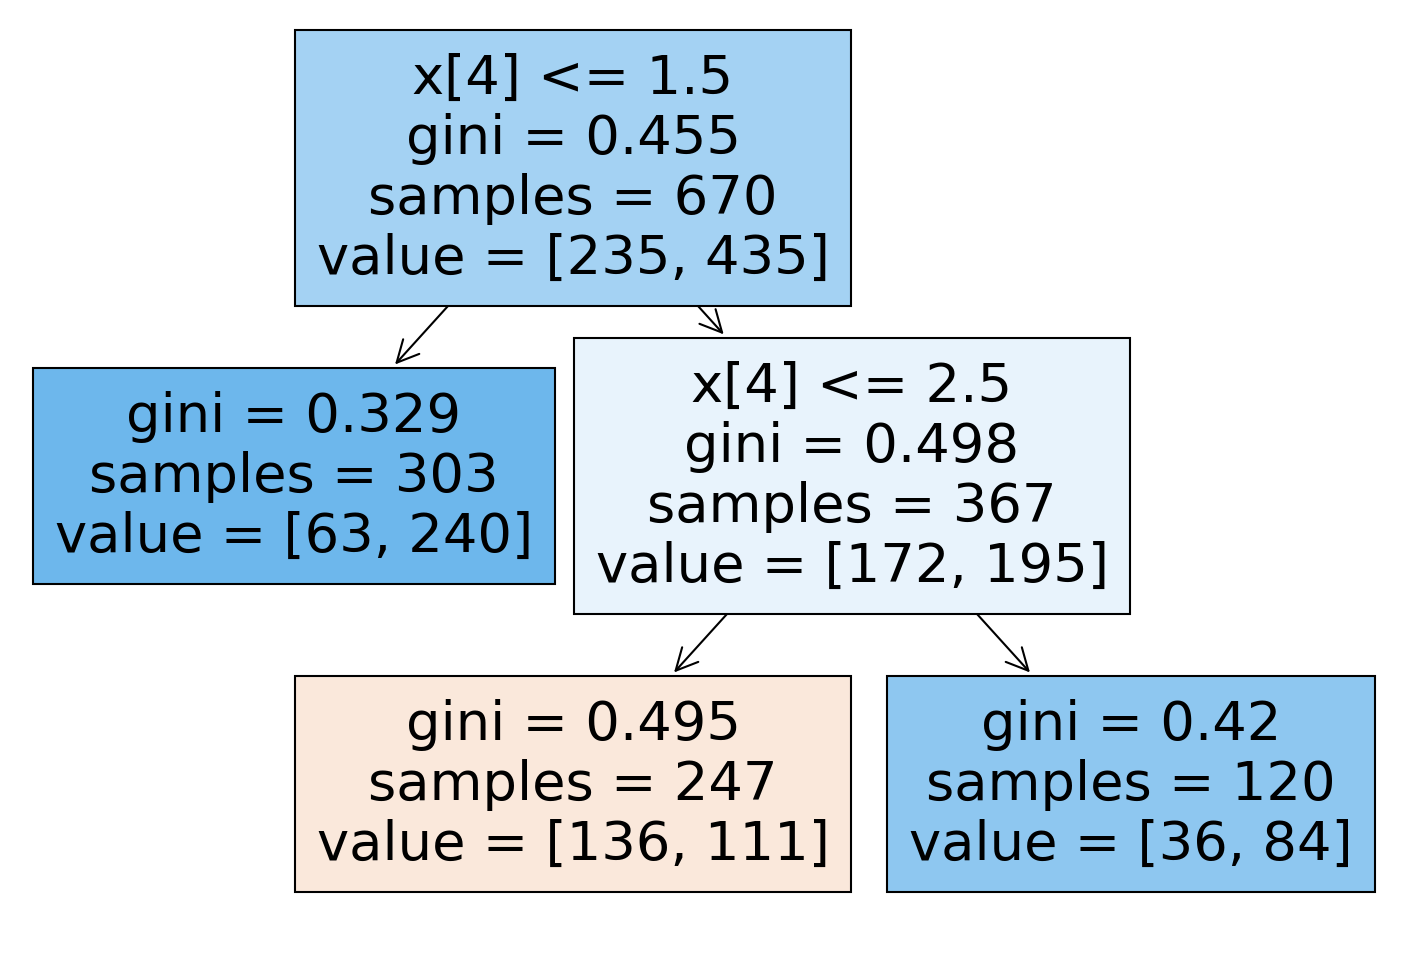

In [59]:
report_model(pruned_tree)

## Criterion

In [60]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

    negative       0.89      0.84      0.86        97
    positive       0.92      0.95      0.93       191

    accuracy                           0.91       288
   macro avg       0.90      0.89      0.90       288
weighted avg       0.91      0.91      0.91       288





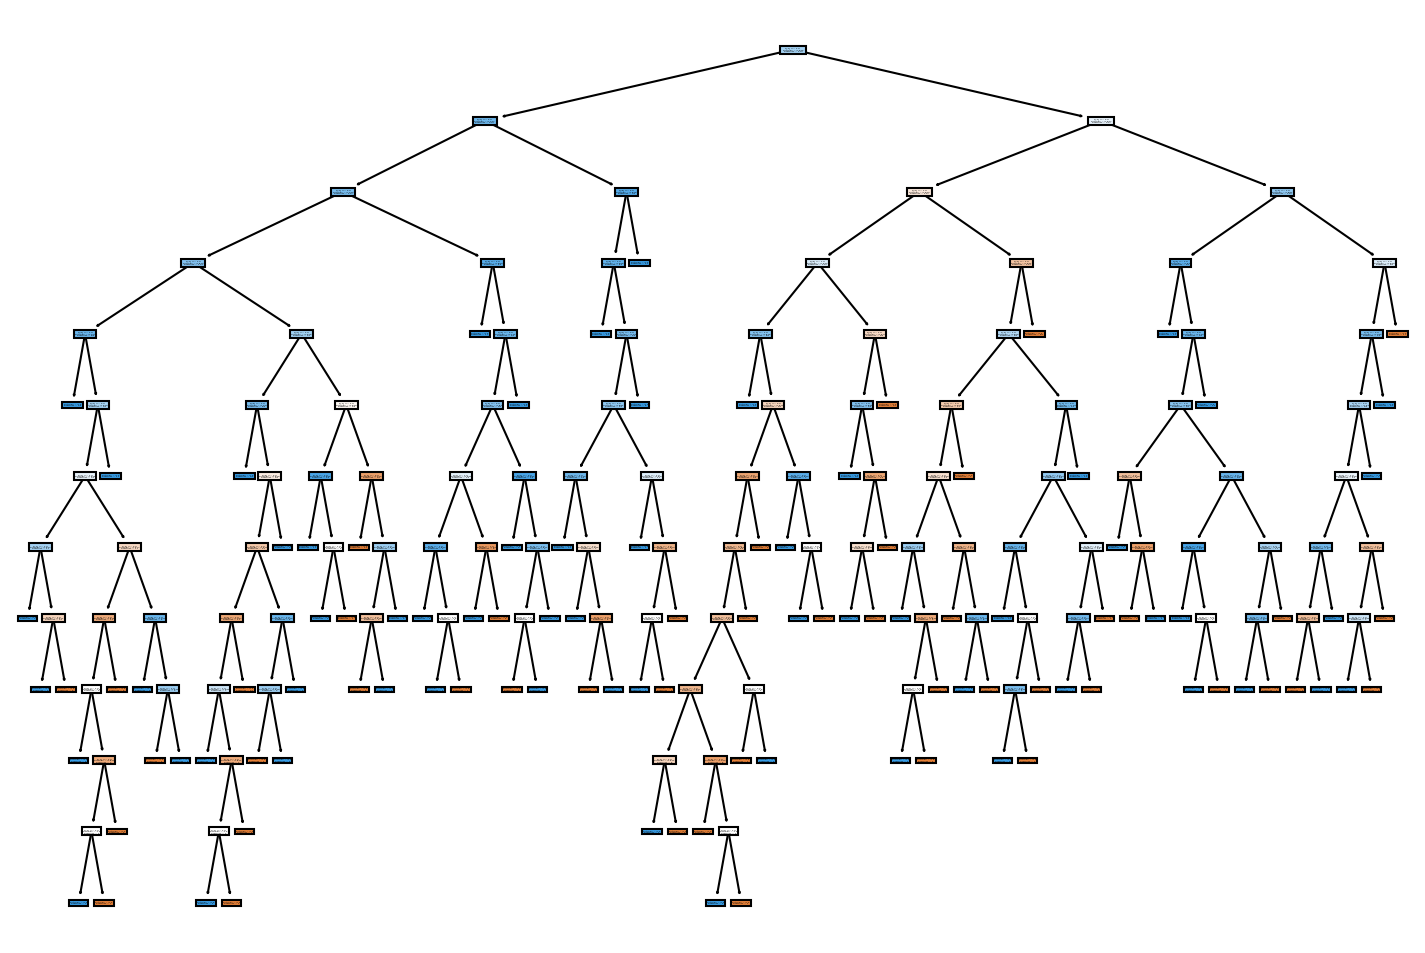

In [61]:
report_model(entropy_tree)